**KNN Classifier**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

In [9]:
# Load the MNIST dataset
mnist_train = pd.read_csv('MNIST_train.csv')
mnist_test = pd.read_csv('MNIST_test.csv')
mnist_train.shape

(60000, 787)

In [13]:
mnist_train.describe ()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
count,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,29999.500000,29999.500000,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,17320.652413,17320.652413,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,14999.750000,14999.750000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,29999.500000,29999.500000,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,44999.250000,44999.250000,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,59999.000000,59999.000000,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [3]:
mnist_test.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Separate features and labels and Normalize pixel values to [0, 1]
X_train = mnist_train.iloc[:, 3:].to_numpy() / 255.0
y_train = mnist_train['labels'].to_numpy()
X_test = mnist_test.iloc[:, 3:].to_numpy() / 255.0
y_test = mnist_test['labels'].to_numpy()

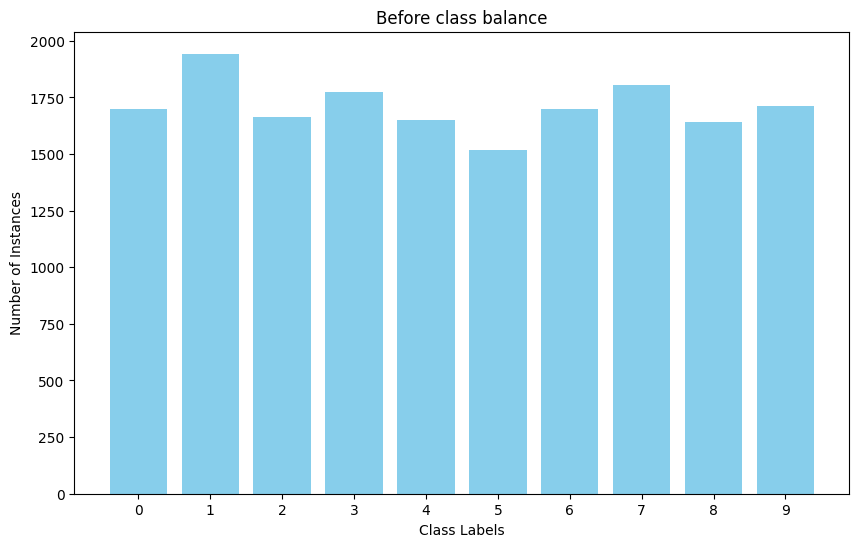

In [10]:
import numpy as np
import matplotlib.pyplot as plt

unique, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(10, 6))
plt.bar(unique, counts, color='skyblue')

plt.xlabel('Class Labels')
plt.ylabel('Number of Instances')
plt.title('Before class balance')
plt.xticks(unique)

plt.show()

In [8]:
#Class balance
balanced_X_train = []
balanced_y_train = []

# Find the minimum class count (minority class)
min_count = min(counts)

# Loop through each class and undersample
for label in unique:
    class_indices = np.where(y_train == label)[0]
    class_X = X_train[class_indices]
    class_y = y_train[class_indices]

    # Randomly select min_count samples
    selected_indices = np.random.choice(len(class_y), min_count, replace=False)

    # Append the selected data
    balanced_X_train.append(class_X[selected_indices])
    balanced_y_train.append(class_y[selected_indices])

# Combine all balanced classes
balanced_X_train = np.vstack(balanced_X_train)
balanced_y_train = np.hstack(balanced_y_train)

{0: 1516, 1: 1516, 2: 1516, 3: 1516, 4: 1516, 5: 1516, 6: 1516, 7: 1516, 8: 1516, 9: 1516}


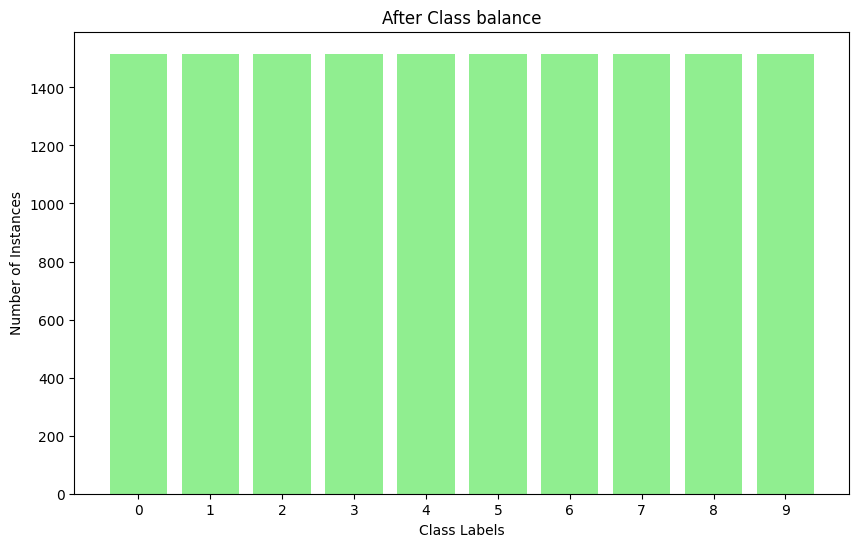

In [11]:
new_unique, new_counts = np.unique(balanced_y_train, return_counts=True)
print(dict(zip(new_unique, new_counts)))

# Plot the new class distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(new_unique, new_counts, color='lightgreen')
plt.xlabel('Class Labels')
plt.ylabel('Number of Instances')
plt.title('After Class balance')
plt.xticks(new_unique)
plt.show()

##KNN Classifier

In [18]:
# Implementing KNN Classifier
class KNNClassifier:
    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X, K, epsilon=1e-3):
        N = len(X)
        y_hat = np.zeros(N)
        for i in range(N):
            dist2 = np.sum((self.X - X[i]) ** 2, axis=1)
            idxt = np.argsort(dist2)[:K]
            gamma_k = 1 / (np.sqrt(dist2[idxt] + epsilon))
            y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()
        return y_hat

In [19]:
# Train and predict with KNN
knn = KNNClassifier()
knn.fit(X_train, y_train)

knn_predictions = knn.predict(X_test, K=5)

In [20]:
def accuracy(y, y_hat):
    return np.mean(y == y_hat)

knn_accuracy = accuracy(y_test, knn_predictions)
print(f'KNN Accuracy: {knn_accuracy:.4f}')

KNN Accuracy: 0.9691


In [23]:
# Evaluate performance by digit
digit_performance = {}
for digit in range(10):
    digit_indices = y_test == digit
    digit_accuracy = accuracy(y_test[digit_indices], knn_predictions[digit_indices])
    digit_performance[digit] = digit_accuracy
    print(f'Accuracy for digit {digit}: {digit_accuracy:.4f}')

Accuracy for digit 0: 0.9939
Accuracy for digit 1: 0.9982
Accuracy for digit 2: 0.9583
Accuracy for digit 3: 0.9634
Accuracy for digit 4: 0.9603
Accuracy for digit 5: 0.9652
Accuracy for digit 6: 0.9864
Accuracy for digit 7: 0.9630
Accuracy for digit 8: 0.9405
Accuracy for digit 9: 0.9584


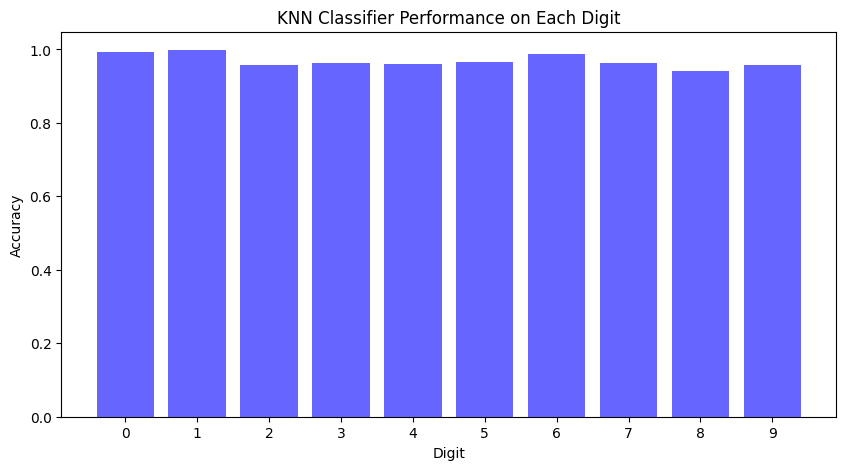

In [24]:
# Visualize predictions
plt.figure(figsize=(10, 5))
plt.bar(digit_performance.keys(), digit_performance.values(), color='blue', alpha=0.6)
plt.xlabel('Digit')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Performance on Each Digit')
plt.xticks(range(10))
plt.show()

**Naive Bayes Classifier**

In [25]:
from scipy.stats import multivariate_normal as mvn

class GaussNB:
    def fit(self, X, y, epsilon=1e-3):
        self.likelihoods = {}
        self.priors = {}
        self.k = set(y.astype(int))
        for k in self.k:
            X_k = X[y == k]
            self.likelihoods[k] = {'mean': X_k.mean(axis=0), 'cov': X_k.var(axis=0) + epsilon}
            self.priors[k] = len(X_k) / len(X)

    def predict(self, X):
        N, D = X.shape
        P_hat = np.zeros((N, len(self.k)))
        for k, l in self.likelihoods.items():
            P_hat[:, k] = mvn.logpdf(X, l['mean'], l['cov']) + np.log(self.priors[k])
        return P_hat.argmax(axis=1)

In [26]:
# Train and predict with Naive Bayes
gnb = GaussNB()
gnb.fit(X_train, y_train)

nb_predictions = gnb.predict(X_test)

In [27]:
# Calculate accuracy for Naive Bayes
nb_accuracy = accuracy(y_test, nb_predictions)
print(f'Naive Bayes Accuracy: {nb_accuracy:.4f}')

Naive Bayes Accuracy: 0.7746


In [30]:
# Evaluate performance by digit for Naive Bayes
digit_performance_nb = {}
for digit in range(10):
    digit_indices = y_test == digit
    digit_accuracy = accuracy(y_test[digit_indices], nb_predictions[digit_indices])
    digit_performance_nb[digit] = digit_accuracy
    print(f'Naive Bayes Accuracy for digit {digit}: {digit_accuracy:.4f}')

Naive Bayes Accuracy for digit 0: 0.9051
Naive Bayes Accuracy for digit 1: 0.9577
Naive Bayes Accuracy for digit 2: 0.6686
Naive Bayes Accuracy for digit 3: 0.7584
Naive Bayes Accuracy for digit 4: 0.5692
Naive Bayes Accuracy for digit 5: 0.5235
Naive Bayes Accuracy for digit 6: 0.9175
Naive Bayes Accuracy for digit 7: 0.7578
Naive Bayes Accuracy for digit 8: 0.7402
Naive Bayes Accuracy for digit 9: 0.9029


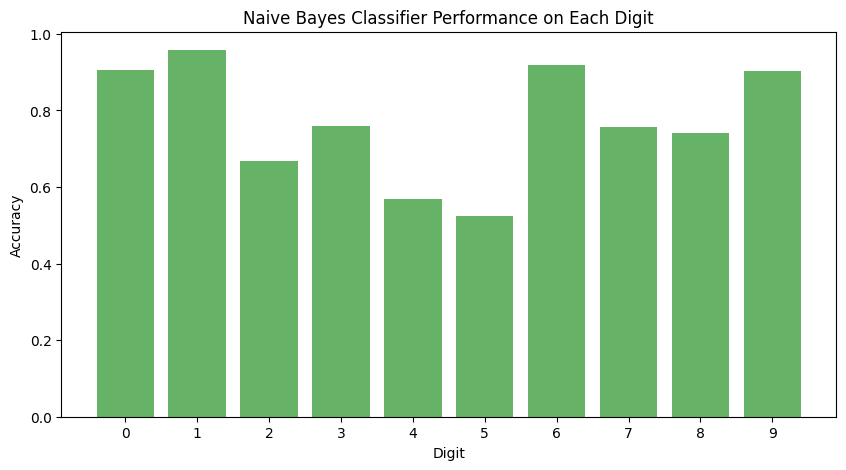

In [31]:
# Visualize Naive Bayes performance by digit
plt.figure(figsize=(10, 5))
plt.bar(digit_performance_nb.keys(), digit_performance_nb.values(), color='green', alpha=0.6)
plt.xlabel('Digit')
plt.ylabel('Accuracy')
plt.title('Naive Bayes Classifier Performance on Each Digit')
plt.xticks(range(10))
plt.show()